# Ejercicio 4 - PCA + KMeans

**Dataset**: MNIST

Con las implementaciones de sklearn, tomar las componentes principales que capturen el 90% de la varianza y aplicar kmeans para agrupar los dígitos en 10 clusters. Analizar los resultados. 

In [276]:
import collections
import math
from sklearn.datasets import fetch_openml

import os
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook

%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

RANDOM_STATE = 17

In [2]:
X, y = fetch_openml("mnist_784", version = 1, return_X_y = True, as_frame = False)

In [3]:
y_num = [int(i) for i in y]

In [4]:
# Cantidad única de clases
clases_2 = np.unique(y_num)
n_clases_2 = len(clases_2)
clases_2.tolist()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [86]:
# Hago un poco de anaálisis exploratorio de datos y cuento la cantidad de etiquetas. Noto que está balanceado el dataset.
counter = collections.Counter(y_num)
counter

Counter({5: 6313,
         0: 6903,
         4: 6824,
         1: 7877,
         9: 6958,
         2: 6990,
         3: 7141,
         6: 6876,
         7: 7293,
         8: 6825})

### Aplicamos PCA

In [6]:
# Estandarizamos
scaler = StandardScaler()
X_scaled_2 = scaler.fit_transform(X)

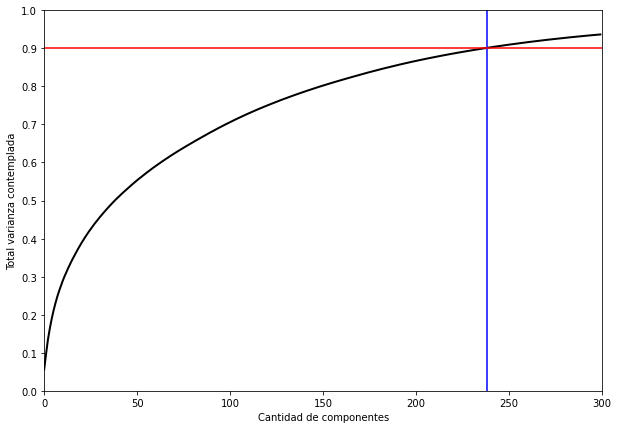

In [7]:
# Pido que me seleccione las primeraas componentes que contemplen el 90% de la varianza
pca_2 = PCA(n_components = 0.9, random_state = RANDOM_STATE).fit(X_scaled_2)
X_pca_2 = pca_2.transform(X_scaled_2)
pca_full_2 = PCA(n_components = 300, random_state = RANDOM_STATE).fit(X_scaled_2)

plt.figure(figsize = (10,7))
plt.plot(np.cumsum(pca_full_2.explained_variance_ratio_), color = 'k', lw = 2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, 300)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(X_pca_2.shape[1], c = 'b')
plt.axhline(0.9, c = 'r')
plt.show();

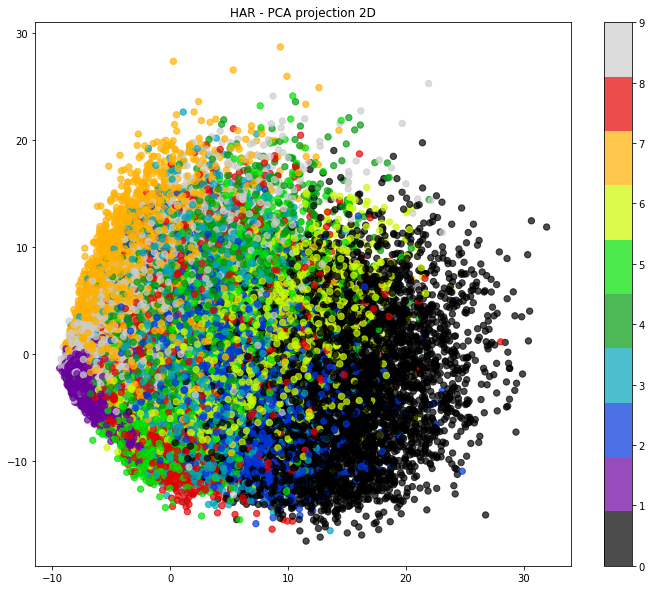

In [8]:
# Graficamos los primeros dos componentes
plt.figure(figsize = (12,10))
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c = y_num, alpha = 0.7, s = 40, cmap = plt.cm.get_cmap('nipy_spectral', 10))
plt.rcParams['axes.grid'] = False #Evita un warning
plt.colorbar()
plt.title('HAR - PCA projection 2D');

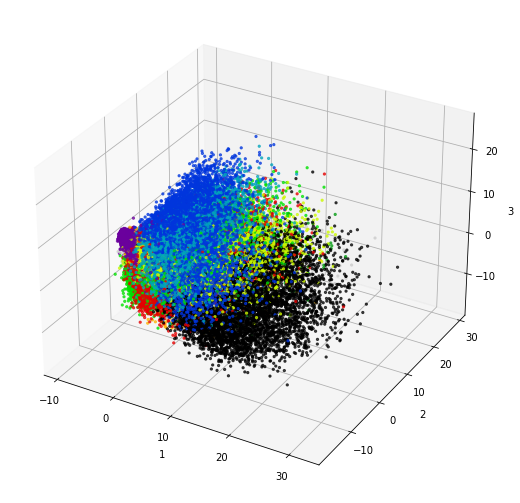

In [9]:
# Graficamos los primeros tres componentes y se puede ver que muy ligeramente se notan las diferencias entre clusters (no tan superpuestos)
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

x = X_pca_2[:, 0]
y = X_pca_2[:, 1]
z = X_pca_2[:, 2]

ax.scatter(x, y, z, c = y_num, alpha = 0.7, s = 5, cmap = plt.cm.get_cmap('nipy_spectral', 10))

ax.set_xlabel('1')
ax.set_ylabel('2')
ax.set_zlabel('3')

plt.show()

### Clusterización

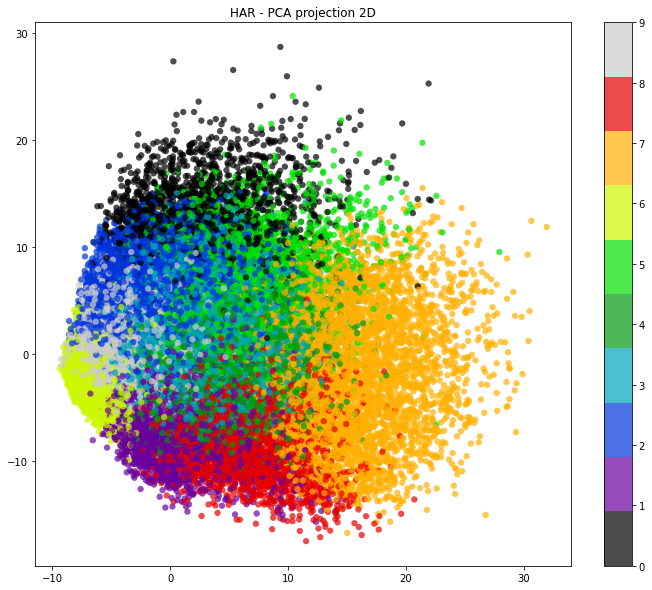

In [10]:
kmeans_3 = KMeans(n_clusters = 10, n_init = 100, random_state = RANDOM_STATE)
kmeans_3.fit(X_pca_2)
cluster_labels_10 = kmeans_3.labels_

plt.figure(figsize = (12,10))
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c = cluster_labels_10, edgecolor = 'none', alpha = 0.7, s = 40, cmap = plt.cm.get_cmap('nipy_spectral', 10))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('HAR - PCA projection 2D');

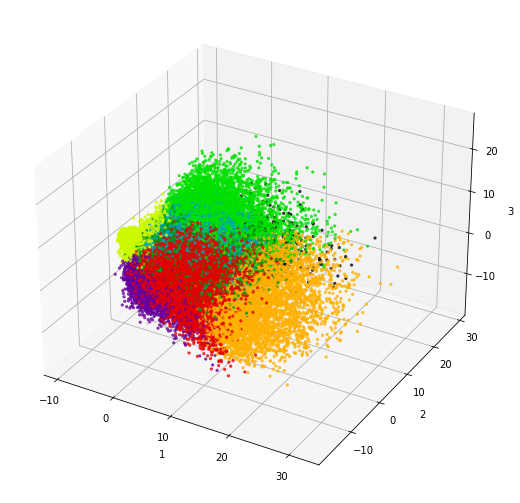

In [11]:
# Graficamos los primeros tres componentes
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

x = X_pca_2[:, 0]
y = X_pca_2[:, 1]
z = X_pca_2[:, 2]

ax.scatter(x, y, z, c = cluster_labels_10, alpha = 0.7, s = 5, cmap = plt.cm.get_cmap('nipy_spectral', 10))

ax.set_xlabel('1')
ax.set_ylabel('2')
ax.set_zlabel('3')

plt.show()

Se puede ver cómo por kmeans los clusters son más definidos y se ven más cómodamente agrupados. Con esto no se asume de ninguna manera que los agrupa mejor, ya que es una aproximación.

In [12]:
tab = pd.crosstab(np.array(y_num), cluster_labels_10, margins = True)
tab.index = clases_2.tolist() + ["ALL"]
tab.columns = ['cluster ' + str(i + 0) for i in range(10)] + ["ALL"]
tab

,cluster 0,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7,cluster 8,cluster 9,ALL
0,10,664,13,1322,358,116,35,3906,473,6,6903
1,1,159,7,28,16,13,7638,0,10,5,7877
2,40,85,190,731,849,2376,829,40,1820,30,6990
3,105,119,196,4110,88,727,575,11,1116,94,7141
4,343,944,3991,5,128,73,535,57,27,721,6824
5,64,2709,312,2134,102,243,467,33,159,90,6313
6,5,139,27,108,5316,425,560,283,12,1,6876
7,916,127,1610,10,3,15,523,20,13,4056,7293
8,73,2097,359,2595,31,197,1168,45,78,182,6825
9,431,127,3511,124,5,23,339,44,14,2340,6958


In [21]:
tab_df = pd.DataFrame(tab)

In [284]:
# Se reordenaron las columnas según valores máximos.
# La asignación se hizo como problema de optimización, corriendo un código de programación lineal en lenguaje ZIMPL.
new_order = [7,6,5,3,2,1,4,9,8,0,10]
tab_new_order = tab.iloc[:,new_order]
tab_new_order.columns = ['cluster ' + str(i + 0) for i in range(10)] + ["ALL"]
tab_new_order

,cluster 0,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7,cluster 8,cluster 9,ALL
0,3906,35,116,1322,13,664,358,6,473,10,6903
1,0,7638,13,28,7,159,16,5,10,1,7877
2,40,829,2376,731,190,85,849,30,1820,40,6990
3,11,575,727,4110,196,119,88,94,1116,105,7141
4,57,535,73,5,3991,944,128,721,27,343,6824
5,33,467,243,2134,312,2709,102,90,159,64,6313
6,283,560,425,108,27,139,5316,1,12,5,6876
7,20,523,15,10,1610,127,3,4056,13,916,7293
8,45,1168,197,2595,359,2097,31,182,78,73,6825
9,44,339,23,124,3511,127,5,2340,14,431,6958


In [288]:
# La tasa de aciertos es la siguiente:
aciertos = 0
for i in range(10):
    aciertos = aciertos + tab_new_order.iloc[i,i]
aciertos/tab_new_order.iloc[10,10]

0.49444285714285713

In [282]:
# Se expresó la tabla anterior en porcentajes
prop_tab = tab_new_order.copy()
for i in range(10):
    for j in range(10):
        prop_tab.iloc[i,j] = round(tab_new_order.iloc[i,j]/tab_new_order.iloc[i,10]*100,0)
prop_tab

,cluster 0,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7,cluster 8,cluster 9,ALL
0,57,1,2,19,0,10,5,0,7,0,6903
1,0,97,0,0,0,2,0,0,0,0,7877
2,1,12,34,10,3,1,12,0,26,1,6990
3,0,8,10,58,3,2,1,1,16,1,7141
4,1,8,1,0,58,14,2,11,0,5,6824
5,1,7,4,34,5,43,2,1,3,1,6313
6,4,8,6,2,0,2,77,0,0,0,6876
7,0,7,0,0,22,2,0,56,0,13,7293
8,1,17,3,38,5,31,0,3,1,1,6825
9,1,5,0,2,50,2,0,34,0,6,6958


* Puede apreciarse que la idea era tener el máximo en las coordenadas en donde i=j (es decir, la diagonal). 
* Puede notarse cómo el 50% de la fila 9 se encuentra en el cluster 4. Es esperable, dado que el 9 y el 4 pueden ser dibujados de manera similar en las imágenes.
* Otra cuestión a resaltar es la tasa de aciertos que tiene el número 1 (97%). Esto puede deberse a la sencillez de este número al ser dibujado, lo que produce mucha menos confusión en al clasificación.

A continuación, va a realizarse algunas pruebas manuales para verificar cómo asignamos los clusters y cómo erró el modelo. Para ello, vamos a renombrar las etiquetas según lo que se consideró en la tabla de arriba. Por ejemplo: el cluster originalmente 6, como tiene la gran mayoría de coincidencias con la etoqueta REAL del número 1, se lo renombró como cluster 1 para que quede en coincidencia.

In [181]:
new_dict_cluster = {
    7: 0,
    6: 1,
    5: 2,
    3: 3,
    2: 4,
    1: 5,
    4: 6,
    9: 7,
    8: 8,
    0: 9,
}    

new_cluster_labels_10 = [new_dict_cluster[i] for i in cluster_labels_10]

In [182]:
# Creo dataframe con resultados reales y con la etiqueta de los clusters renombrado
df_sum = pd.DataFrame({"REAL":y_num, "CLUSTER":new_cluster_labels_10})

In [184]:
# Filtro un dataset que haya acertado con las etiquetas de número 1, y verifico que conincida con la cantidad del cluster de la tabla (7638)
r = df_sum.iloc[np.array(new_cluster_labels_10) == 1,:]
r = r.iloc[(r["REAL"] == 1).tolist(),:]
r

,REAL,CLUSTER
3,1,1
6,1,1
8,1,1
14,1,1
23,1,1
...,...,...
69956,1,1
69969,1,1
69978,1,1
69984,1,1


In [278]:
# Defino una función para que me dibuje las imágenes mal clasificadas

def ver_error(num, cant):
    
    r = df_sum.iloc[np.array(new_cluster_labels_10) != num,:]
    r = r.iloc[(r["REAL"] == num).tolist(),:]
        
    l = r.index[0:cant] 
         
    col = min(len(l), 10)
    row = int(math.ceil(cant/col))
    counter = 1
    num_list = []
    for i in l:
        sample = X[i]
        num_list.append(sample)       
               
        plt.subplot(row, col, counter)
        sample = np.reshape(sample, (28, 28));
        plt.title(str(df_sum["CLUSTER"][i]), c = 'White')
        
        plt.tick_params(
        axis = 'both',
        which = 'both',
        left = False,
        right = False,        
        bottom = False,
        top = False,
        labelbottom = False,
        labelleft = False)
            
        plt.imshow(sample)
        counter += 1       

    plt.show()

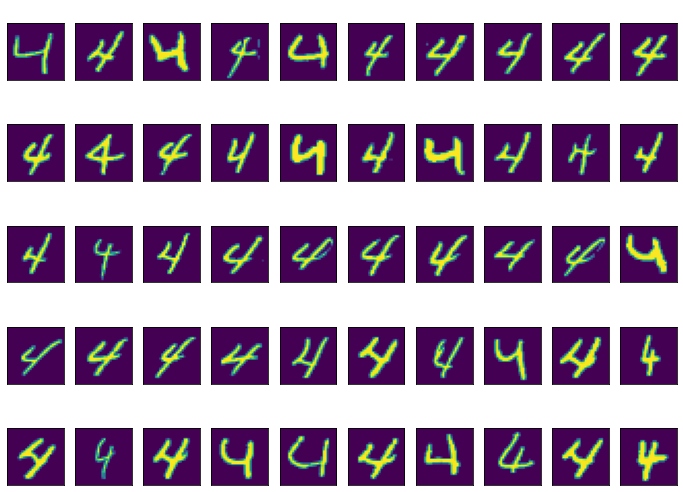

In [283]:
# Ejemplo de imágenes mal clasificadas, con la categoría que asignó el cluster
# Acá elijo los 50 primeros números 4 que fueorn mal clasificados
ver_error(4, 50)

Los pasos a continuación se hicieron por mera curiosidad, sabiendo que no era razonable clusterizar el dataset con K distinto de 10.

In [13]:
# Vemos la inercia (suma de las distancias de los miembros de un cluster a su centroide)
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, n_init = 100, random_state = RANDOM_STATE).fit(X_pca_2)
    inertia.append(np.sqrt(kmeans.inertia_))
inertia

[6731.993562026446,
 6586.901852344347,
 6497.6808129763,
 6419.429879586718,
 6353.859359354891,
 6297.587125645987,
 6246.195997799283,
 6202.710846744457,
 6163.958939202819]

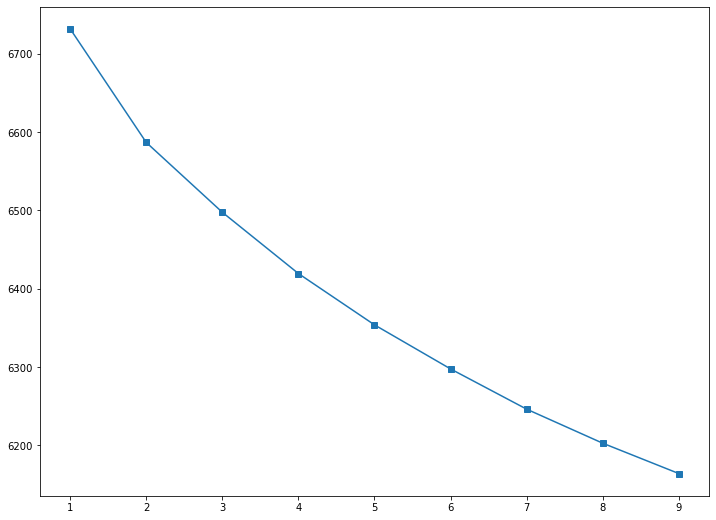

In [14]:
plt.plot(range(1, 10), inertia, marker = 's')
plt.show()

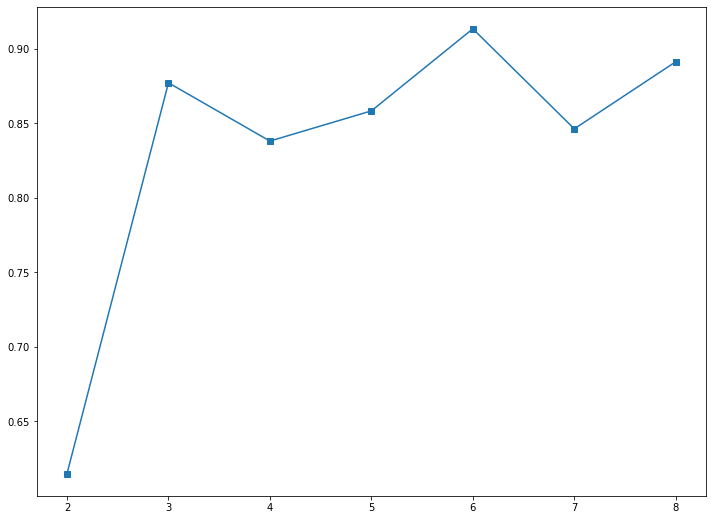

In [17]:
d = []
for k in range(2, 9):
    i = k - 1
    D = (inertia[i] - inertia[i + 1])  / (inertia[i - 1] - inertia[i])
    d.append(D)

plt.plot(range(2, 9), d, marker = 's')
plt.show()

* Como se mencionó anteriormente, estos pasos adicionales se hicieorn por curiosodad. Se esperaba encontrar un codo y especular un poco con el significado de ese codo, pero se ve que la proporción de pérdida es gradual.
* Este trabajo sería muy interesante hacerlo para los números 0 y 1, seguramente se obtengan mejores resultados con el método kmeans.
* Por otra parte, ocurre lo mismo que el el punto anterior (influencia de aleatoriedad), dado que estamos trabajando con el mismo algoritmo que descansa fuertemente en el componente random.